# Testing the user defined function

In [1]:
from mango.tuner import Tuner

In [3]:
from scipy.stats import uniform


param_dict = {"n_neighbors": range(1, 50),
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
             }

# userObjective

In [4]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score


X, Y = datasets.load_breast_cancer(return_X_y=True)

def objectiveKNN(args_list):
    global X,Y
    
    results = []
    for hyper_par in args_list:
        clf = KNeighborsClassifier(**hyper_par)
        result  = cross_val_score(clf, X, Y, scoring='accuracy').mean()
        results.append(result)
    return results

In [5]:
conf_Dict = dict()
conf_Dict['batch_size'] = 5
conf_Dict['num_iteration'] = 5

# Defining Tuner

In [6]:
tuner_user = Tuner(param_dict, objectiveKNN, conf_Dict)

In [7]:
tuner_user.getConf()

{'param_dict': {'n_neighbors': range(1, 50),
  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']},
 'userObjective': <function __main__.objectiveKNN(args_list)>,
 'domain_size': 5000,
 'initial_random': 1,
 'num_iteration': 5,
 'objective': 'maximize',
 'batch_size': 5}

In [8]:
results = tuner_user.run()

# Inspect the results

In [9]:
print('best hyper parameters:',results['best_hyper_parameter'])
print('best objective:',results['best_objective'])

best hyper parameters: {'algorithm': 'brute', 'n_neighbors': 11}
best objective: 0.931486122714193


In [10]:
print('Sample hyper parameters tried:',len(results['hyper_parameters_tried']))
print(results['hyper_parameters_tried'][:2])

Sample hyper parameters tried: 26
[{'n_neighbors': 24, 'algorithm': 'kd_tree'}, {'algorithm': 'auto', 'n_neighbors': 1}]


In [11]:
print('Sample objective values',len(results['objective_values']))
print(results['objective_values'][:5])

Sample objective values 26
[0.9156966490299824, 0.9050960735171261, 0.9157059314954052, 0.9139422630650701, 0.9157059314954052]


# Plotting the variation in objective values of the tried results

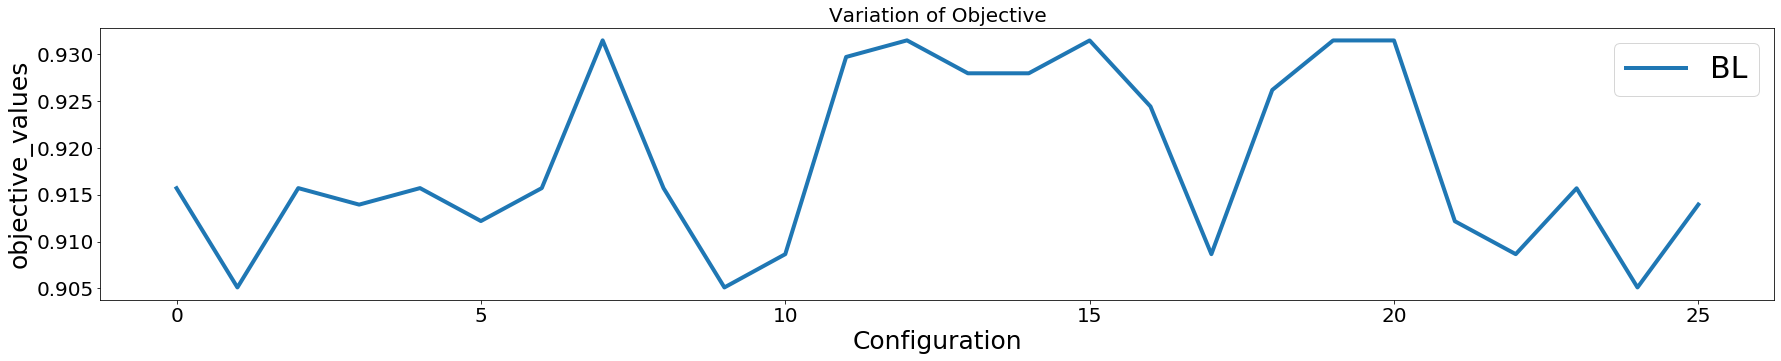

In [13]:
Size = 201 

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(30,5))
plt.title('Variation of Objective',fontsize=20)
plt.plot(results['objective_values'][:Size],lw=4,label='BL')
plt.xlabel('Configuration', fontsize=25)
plt.ylabel('objective_values',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(prop={'size': 30})
plt.show()

# Plotting the variation of Max objective values of the tried results

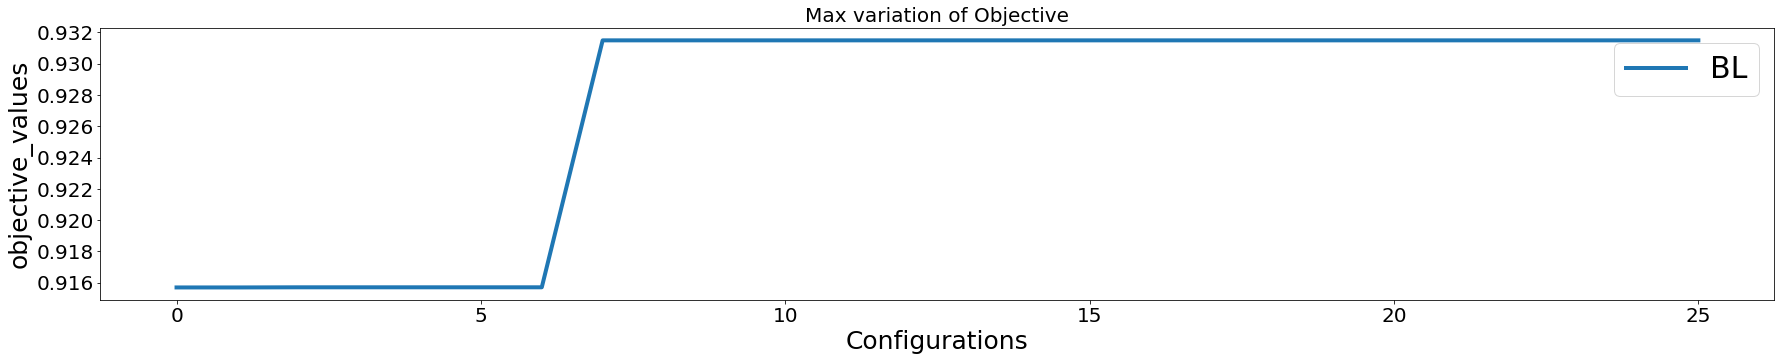

In [14]:
Size = 30 

import numpy as np

results_obj = np.array(results['objective_values'])

y_max=[]
for i in range(results_obj.shape[0]):
    y_max.append(np.max(results_obj[:i+1]))

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(30,5))
plt.title('Max variation of Objective',fontsize=20)
plt.plot(y_max[:Size],lw=4,label='BL')
plt.xlabel('Configurations', fontsize=25)
plt.ylabel('objective_values',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(prop={'size': 30})
plt.show()

# See the Result

In [15]:
import pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(results)

{   'best_hyper_parameter': {'algorithm': 'brute', 'n_neighbors': 11},
    'best_objective': 0.931486122714193,
    'hyper_parameters_tried': [   {'algorithm': 'kd_tree', 'n_neighbors': 24},
                                  {'algorithm': 'auto', 'n_neighbors': 1},
                                  {'algorithm': 'ball_tree', 'n_neighbors': 36},
                                  {'algorithm': 'kd_tree', 'n_neighbors': 43},
                                  {'algorithm': 'ball_tree', 'n_neighbors': 35},
                                  {'algorithm': 'ball_tree', 'n_neighbors': 31},
                                  {'algorithm': 'auto', 'n_neighbors': 35},
                                  {'algorithm': 'brute', 'n_neighbors': 11},
                                  {'algorithm': 'brute', 'n_neighbors': 36},
                                  {'algorithm': 'kd_tree', 'n_neighbors': 1},
                                  {'algorithm': 'brute', 'n_neighbors': 49},
                           